# Проект: принятие решений в бизнесе

**Описание проекта**

В наши дни покупки в интеренете занимают большую долю всех совершаемых покупок в мире. Вместе с отделом маркетинга крупного-интеренет магазина был подготовлен список гипотез для увеличения выручки. На основе данных из трёх датасетов (с гипотезами, с заказами пользователей и с данными о посетителях) приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.

**Цель исследования**

На основе A/B-тестирования проверить жизнеспособность гипотез и подготовить рекомендации для отдела маркетинга.

**Ход исследования:**
- Подготовка данных: загрузка и изучение общей информации из представленных датасетов.
- Приоритезация гипотез: примененние фреймворков ICE и RICE.
- Анализ A/B-теста: построение графиков, расчёт перцентилей, расчёт статистической значимости, принятие решения по результатам.

**Общий вывод:** Резюмирование полученных результатов, формулировка ключевых выводов и рекомендаций.
    
С помощью данного исследования мы пытаемся принять решение об успешности (или провале) теста, и определить, стоит ли его продолжать.

### Часть. Приоритизация гипотез.

In [1]:
import pandas as pd # импортируем нужные библиотеки
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
pd.set_option('max_colwidth', 120)
pd.set_option('display.width', 500)
data = pd.read_csv('/datasets/hypothesis.csv', sep=',') # сохраним в data первый датасет

In [3]:
data.columns = data.columns.str.lower() # приведём названия столбцов в нижний регистр

In [4]:
data # изучим данные о гипотезах

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


#### Применение фреймворка ICE.

In [5]:
data['ICE'] = data['impact'] * data['confidence'] / data['efforts']
data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Таким образом, наиболее перспективные гипотезы по ICE - 8, 0, 7.

#### Применение фреймворка RICE.

In [6]:
data['RICE'] = data['reach'] * data['impact'] * data['confidence'] / data['efforts']
data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


На этот раз наиболее перспективными оказались гипотезы: 7, 2 и 0. В предыдущем тесте гипотезы 7 и 0 так же были наиболее перспективными. Если 7-я гипотеза была на третьем месте, то высокое влияние на пользователей (reach = 10) выдвинуло её на первое место во фреймворке RICE.

### Часть. Анализ A/B-теста.

In [7]:
orders = pd.read_csv('/datasets/orders.csv', sep=',') # изучим данные о заказах
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d')) # преобразуем дату
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [8]:
orders.info() # посмотрим общую информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [9]:
differences = orders.groupby('group')['visitorId'].agg(['count', 'nunique']) # оценим общее количество пользователей по группам
differences['unique_part'] = differences['nunique'] / differences['count'] # и долю уникальных пользователей
differences 

,count,nunique,unique_part
group,,,
A,557,503,0.903052
B,640,586,0.915625


Из полученной таблицы видно, что доля дубликатов практически 10% в каждой группе. В целом, это не должно сильно отразиться на результате исследования.

Теперь ознакомимся с данными второго датафрейма.

In [10]:
visitors = pd.read_csv('/datasets/visitors.csv', sep=',') # изучим данные о посетителях
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d')) # преобразуем дату
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
visitors.info() # посмотрим общую информацию о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


#### Сбор агрегированных кумулятивных по дням данных.

In [12]:
datesGroups = orders[['date','group']].drop_duplicates() # создаем массив уникальных пар значений дат и групп теста

In [13]:
ordersAggregated = datesGroups.apply( # получаем агрегированные кумулятивные по дням данные о заказах 
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [14]:
visitorsAggregated = datesGroups.apply( # получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [15]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [16]:
cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


#### Построение графиков коммулятивной выручки по группам.

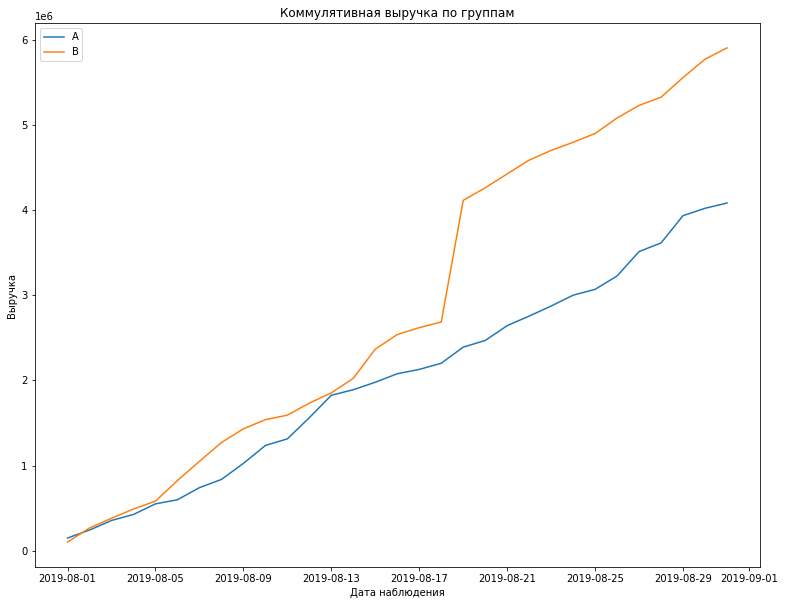

In [17]:
fig, axs = plt.subplots(figsize=(13, 10)) # зададим размер поля для построений
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.ylabel('Выручка')
plt.xlabel('Дата наблюдения')
plt.title('Коммулятивная выручка по группам')
plt.show() 

Выручка почти равномерно увеличивается в течение всего теста. Хороший знак.
Однако графики выручки обеих групп в нескольких точках резко растут. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

#### Построение графиков коммулятивного среднего чека по группам.

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

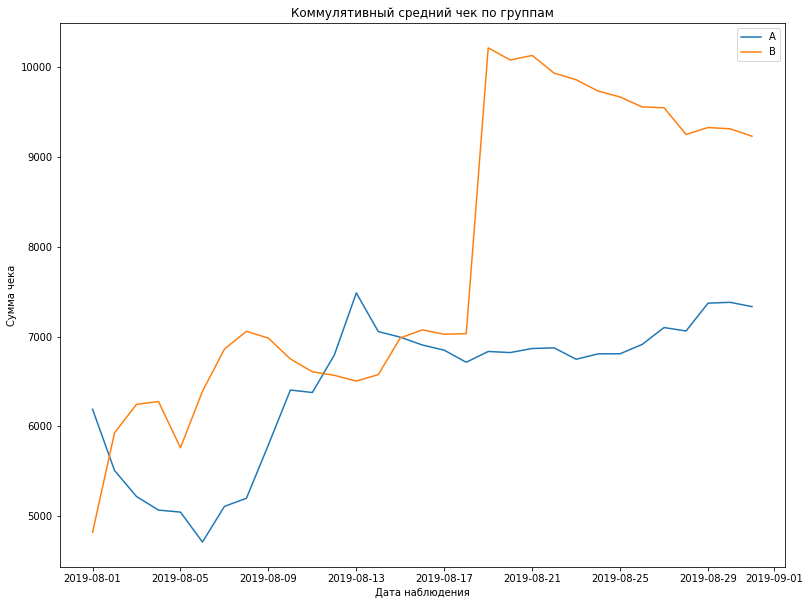

In [18]:
fig, axs = plt.subplots(figsize=(13, 10)) # зададим размер поля для построений
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.ylabel('Сумма чека')
plt.xlabel('Дата наблюдения')
plt.title('Коммулятивный средний чек по группам')
plt.show() 

Средний чек становится равномерным ближе к концу теста: увеличивается для группы A и падает для группы B. Возможно, в группу B в середине теста попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

#### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A.

Построим график относительного различия для среднего чека. Добавим горизонтальную ось методом axhline().

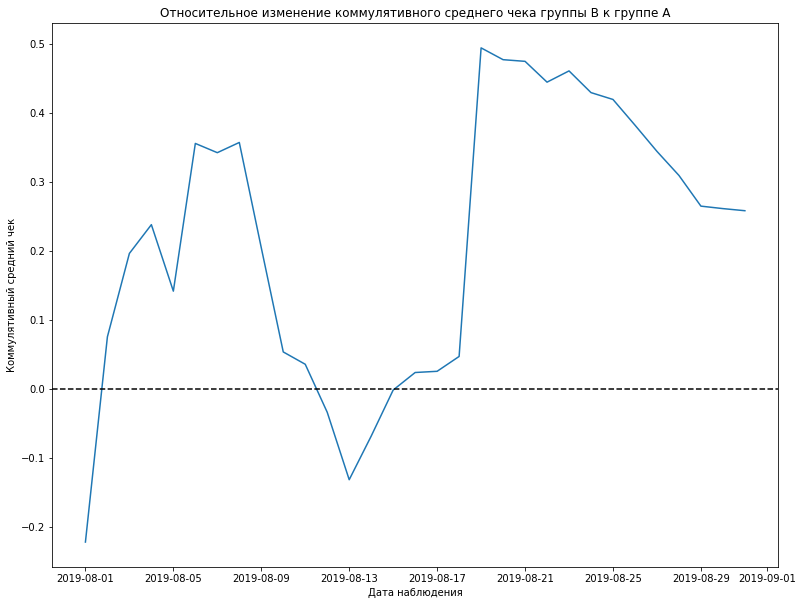

In [19]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

fig, axs = plt.subplots(figsize=(13, 10)) # зададим размер поля для построений
# cтроим отношение средних чеков
plt.plot(
    mergedCumulativeRevenue['date'],
(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(
    mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])
    -1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.ylabel('Коммулятивный средний чек')
plt.xlabel('Дата наблюдения')
plt.title('Относительное изменение коммулятивного среднего чека группы В к группе А')
plt.show()

В нескольких точках график различия между сегментами резко «скачет». Это может говорить о наличии крупных заказов или выбросов.

#### Построение графика кумулятивного среднего количества заказов на посетителя по группам

Аналогично проанализируем график кумулятивного среднего количества заказов на посетителя по группам. Зададим масштаб осей методом plt.axis(). Передадим ему минимальное и максимальное значения оси x; минимальное и максимальное значения оси y.

In [20]:
print(cumulativeData['date'].min())
cumulativeData['date'].max()

2019-08-01 00:00:00


Timestamp('2019-08-31 00:00:00')

(18109.0, 18139.0, 0.0275, 0.04)

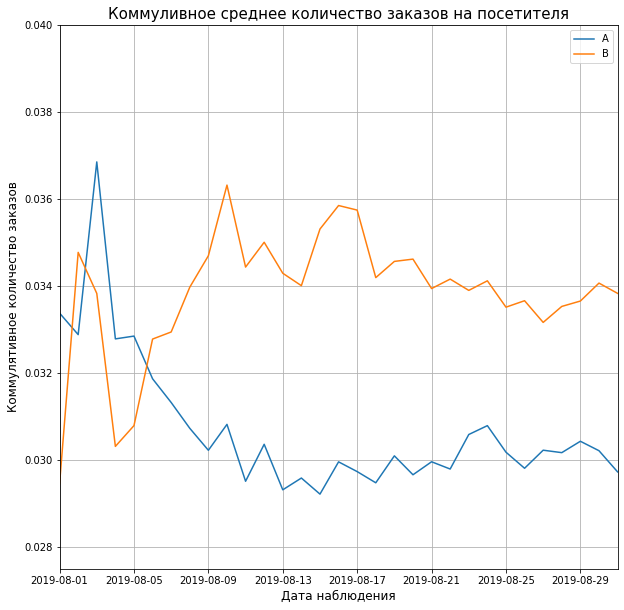

In [21]:
# считаем среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

fig, axs = plt.subplots(figsize=(10, 10)) # зададим размер поля для построений

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.ylabel('Коммулятивное количество заказов', fontsize=12)
plt.xlabel('Дата наблюдения', fontsize=12)
plt.title('Коммуливное среднее количество заказов на посетителя', fontsize=15)
plt.grid()
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), 0.0275, 0.04])

Группы колебались около одного значения, но затем у группы B среднее количество заказов вырвалось вперёд и зафиксировалось, а у группы A — просело, но тоже зафиксировалось.

#### Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

Построим график изменения кумулятивного среднего количества заказов на посетителя группы B к группе A:

(18109.0, 18139.0, -0.3, 0.3)

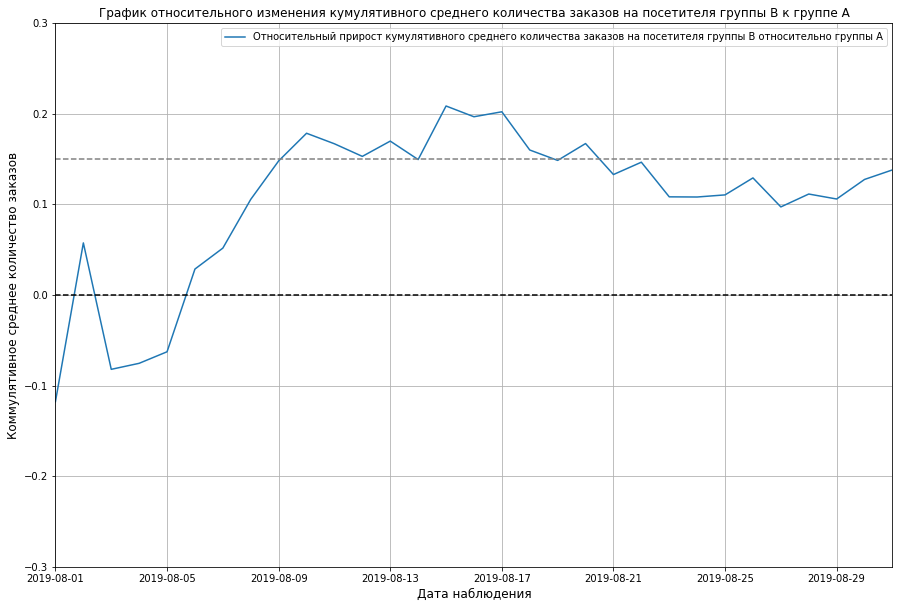

In [22]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']] \
.merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

fig, axs = plt.subplots(figsize=(15, 10))
plt.plot(
         mergedCumulativeConversions['date'],
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A"
)
plt.ylabel('Коммулятивное среднее количество заказов', fontsize=12)
plt.xlabel('Дата наблюдения', fontsize=12)
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A',
          fontsize=12)
plt.grid()
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 8, 31), -0.3, 0.3])

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд и удерживала лидирующую позицию относительно группы А.
В целом отношение среднего количества заказов на посетителя ещё не установилось, и сейчас делать какие-либо выводы по тесту нельзя. Сперва стоит проанализировать аномалии.

#### Построение точечного графика количества заказов по пользователям.

Подсчитаем количество заказов по пользователям:

In [23]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Построим точечную диаграмму числа заказов на одного пользователя:

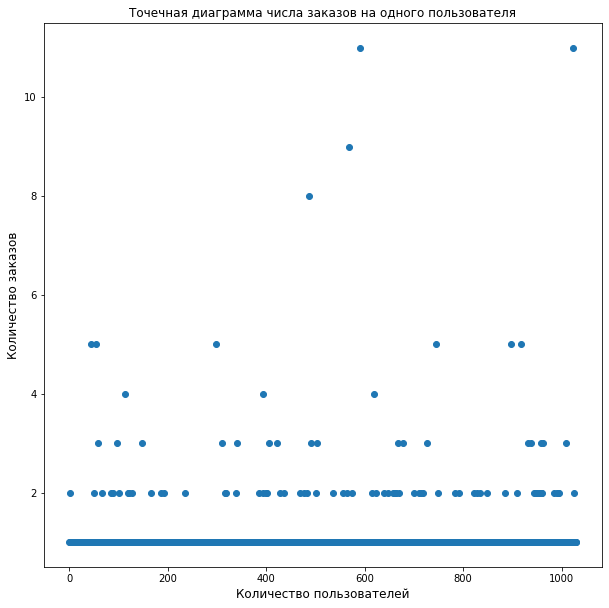

In [24]:
x_values = pd.Series(range(0,len(ordersByUsers)))
fig, axs = plt.subplots(figsize=(10, 10)) # зададим размер поля для построений
plt.scatter(x_values, ordersByUsers['orders'])
plt.ylabel('Количество заказов', fontsize=12)
plt.xlabel('Количество пользователей', fontsize=12)
plt.title('Точечная диаграмма числа заказов на одного пользователя',
          fontsize=12)
plt.show()

Проанализировав график, отметим, что основная доля покупателей сделала 1 заказ, но также много пользователей с 2-3 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет. 
Посчитаем выборочные перцентили количества заказов на одного пользователя.

#### Расчёт 95-й и 99-й перцентилей количества заказов на пользователя.

In [25]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей заказывали более четырёх раз. 
Разумно выбрать 2 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней. 

#### Построение точечного графика стоимостей заказов.

Оценим распределение стоимостей заказов с помощью точечной диаграммы:

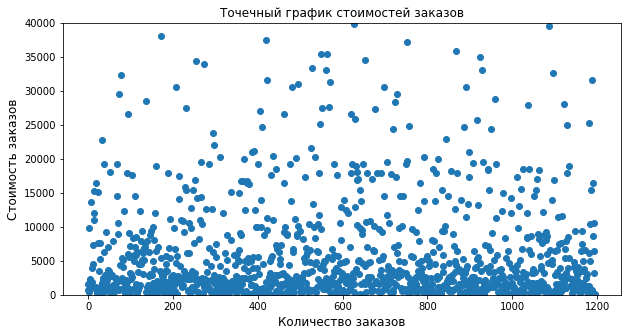

In [26]:
x_values = pd.Series(range(0, len(orders['revenue'])))
fig, axs = plt.subplots(figsize=(10, 5)) # зададим размер поля для построений

axs.set_ylim(0,40000) # зададим ограничение по оси y
plt.scatter(x_values, orders['revenue'])
plt.ylabel('Стоимость заказов', fontsize=12)
plt.xlabel('Количество заказов', fontsize=12)
plt.title('Точечный график стоимостей заказов',
          fontsize=12)
plt.show()

Как видно из графика, основная масса заказов не превышает по стоимости 10000. Встречаются особо дорогие заказы стоимостью более миллиона. Скорее всего они и могут приводить к скачкам на графике коммулятивного среднего чека.
Посчитаем выборочные перцентили стоимости заказов.

#### Расчёт 95-й и 99-й перцентилей стоимости заказов.

In [27]:
print(orders.head(10))
print(np.percentile(orders['revenue'], [95, 99]))

   transactionId   visitorId       date  revenue group
0     3667963787  3312258926 2019-08-15     1650     B
1     2804400009  3642806036 2019-08-15      730     B
2     2961555356  4069496402 2019-08-15      400     A
3     3797467345  1196621759 2019-08-15     9759     B
4     2282983706  2322279887 2019-08-15     2308     B
5      182168103   935554773 2019-08-15     2210     B
6      398296753  2900797465 2019-08-15     1860     B
7     2626614568    78758296 2019-08-15     1044     A
8     1576988021   295230930 2019-08-15    13710     A
9     1506739906  1882260405 2019-08-15     1855     B
[28000.  58233.2]


Не более 5% пользователей оформляли заказы дороже 28 тысяч. И 1% пользователей оплатили заказы дороже 58 тысяч. 
Разумно выбрать стоимость заказа 28000 за верхнюю границу стоимости заказов, и отсеять аномальных пользователей по ней.

####  Расчёт статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

Подготовим данные в новой таблице data_2:

In [28]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

In [29]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [30]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

In [31]:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [32]:
data_2 = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data_2.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  revenuePerDateB  ordersCummulativeA  revenueCummulativeA  ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  visitorsPerDateB  visitorsCummulativeA  visitorsCummulativeB
0 2019-08-01              24           148579              21           101217                  24               148579                  21               101217               719               713                   719                   713
1 2019-08-02              20            93822              24           165531                  44               242401                  45               266748               619               581                  1338                  1294
2 2019-08-03              24           112473              16           114248                  68               354874                  61               380996               507               509                  1845                  1803
3 2019-08-04              16        

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [33]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']
ordersByUsersA.head()

,userId,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [34]:
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']
ordersByUsersB.head()

,userId,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


In [35]:

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. 
Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни. Его особенностью является то, что он работает  с рангами, — номерами значений в упорядоченном ряду, — никак не учитывая сами значения. Поэтому в нашем случае, когда работа с самими значениями невозможна из-за выбросов, сильно сдвигающих параметрические результаты, выбор непараметрического теста Манна-Уитни является оптимальным.

In [36]:
sampleA = pd.concat(
    [ordersByUsersA['orders'],pd.Series(
        0, index=np.arange(data_2['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
                          ), name='orders')],axis=0)

In [37]:
sampleB = pd.concat(
    [ordersByUsersB['orders'],pd.Series(
        0, index=np.arange(data_2['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
                          ), name='orders')],axis=0)

Применим критерий Манна-Уитни и отформатируем p-value, округлив его до трёх знаков после запятой.

In [38]:
print('p-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('относительное изменение:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.017
относительное изменение: 0.138


Вывод: По «сырым» данным есть различия в среднем числе заказов групп A и B. 
Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. К тому же относительный проигрыш группы B равен 13.8% — второе число в выводе.

#### Расчёт статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.

Проверим статистическую значимость различий в среднем чеке между сегментами. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. 

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов. 
А ещё найдём относительные различия в среднем чеке между группами:

In [39]:
print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('относительное изменение:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.729
относительное изменение: 0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 

#### Расчёт статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Напомним, что найденные в прошлых уроках 95-й и 99-й перцентили стоимости заказов равны 28000 и 58233.2. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.

Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 

Узнаем, сколько всего аномальных пользователей атрибутом shape.

In [40]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > (np.percentile(ordersByUsers['orders'], 95))]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > (np.percentile(ordersByUsers['orders'], 95))]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > (np.percentile(orders['revenue'], 95))]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
74


Всего 74 аномальных пользователей. 
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [41]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data_2['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data_2['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам:

In [42]:
print('p-value:', '{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('относительное изменение:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value: 0.013
относительное изменение: 0.173


Результаты по среднему количеству заказов практически не изменились. Оценим, произошло ли что-нибудь с результатами по среднему чеку.

#### Расчёт статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.

In [43]:
print('p-value:', 
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('относительное изменение:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value: 0.738
относительное изменение: -0.020


P-value увеличился, но и разница между сегментами сократилась с 26% до -2%.
Хотя общие выводы по результатам теста не изменились, такой пример хорошо показывает, как сильно аномалии могут влиять на результаты A/B-теста

#### Принятие решения по результатам теста.

Таким образом, проанализировав полученные данные можно отметить следующие факты:

- Есть статистически значимые различия по среднему количеству заказов между группами по «сырым», и по данным после фильтрации аномалий (наблюдается явное преобладание группы В);
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий (P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет);
- График различия среднего количества заказов между группами сообщает, что результаты группы B лучше группы A и;
- График различия среднего чека говорит о том, что результаты группы B снижаются день ото дня с середины теста и сейчас почти на 20% хуже установившегося пика 19 августа.

Исходя из обнаруженных фактов, тест следует остановить и признать его успешным, присвоив победу группе B. Продолжать смысла нет, потому как вероятность, что при имеющихся данных сегмент А на самом деле лучше сегмента В — практически нулевая.